In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
dir_path = "E:/data mining/final_project/data/"
df = pd.read_csv(dir_path + "train_2019" + ".csv")

In [3]:
df

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1226,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN
1,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1130,1213.0,43.0,0.0,1444.0,43.0,0.0,0.0,0.0,0.0
2,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,725,710.0,0.0,0.0,304.0,NaN,NaN,NaN,NaN,NaN
3,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,930,914.0,0.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN
4,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1130,1111.0,0.0,0.0,651.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216743,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",El Paso International,29.983,-95.340,12,19,...,2129,2133.0,4.0,0.0,224.0,NaN,NaN,NaN,NaN,NaN
2216744,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Charleston International,29.983,-95.340,12,19,...,2127,2101.0,0.0,0.0,468.0,NaN,NaN,NaN,NaN,NaN
2216745,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Pittsburgh International,29.983,-95.340,12,19,...,2109,2049.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN
2216746,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Norfolk International,29.983,-95.340,12,19,...,2236,2205.0,0.0,0.0,1034.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns.to_list()

['AIRLINE_ID',
 'CARRIER_NAME',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'PREVIOUS_AIRPORT',
 'LATITUDE',
 'LONGITUDE',
 'MONTH',
 'DAY_OF_MONTH',
 'AIRPORT_FLIGHTS_MONTH',
 'SEGMENT_NUMBER',
 'TAIL_NUM',
 'MANUFACTURE_YEAR',
 'PLANE_AGE',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX',
 'TAVG',
 'DEST_AIRPORT_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEPARTING_AIRPORT',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY_NEW',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY_NEW',
 'CANCELLED',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY']

In [5]:
df_feature = df[["AIRLINE_ID", "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID", "MONTH","DAY_OF_MONTH", "PLANE_AGE", "AWND", "PRCP", "SNOW", "TMAX", "TAVG",
             "CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE"]]
df_feature

,AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,MONTH,DAY_OF_MONTH,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE
0,19805,14107,13930,1,20,10,3.36,0.0,NaN,74.0,58.0,800,1226,1440.0
1,19393,14107,13232,1,20,2,3.36,0.0,NaN,74.0,58.0,715,1130,1444.0
2,19393,14107,14679,1,20,15,3.36,0.0,NaN,74.0,58.0,710,725,304.0
3,19393,14107,14869,1,20,21,3.36,0.0,NaN,74.0,58.0,755,930,507.0
4,19393,14107,14771,1,20,7,3.36,0.0,NaN,74.0,58.0,1005,1130,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216743,20378,12266,11298,12,19,4,10.07,0.0,NaN,85.0,78.0,2005,2129,224.0
2216744,20378,12266,13244,12,19,3,10.07,0.0,NaN,85.0,78.0,1945,2127,468.0
2216745,20378,12266,10397,12,19,13,10.07,0.0,NaN,85.0,78.0,1805,2109,689.0
2216746,20378,12266,13487,12,19,5,10.07,0.0,NaN,85.0,78.0,1940,2236,1034.0


## one hot encoding

In [6]:
airline_oh_df = pd.get_dummies(df_feature['AIRLINE_ID'])
arr_airport_oh_df = pd.get_dummies(df_feature['DEST_AIRPORT_ID'])
dep_airport_oh_df = pd.get_dummies(df_feature['ORIGIN_AIRPORT_ID'])

In [7]:
# convert to numpy array
airline_oh = airline_oh_df.to_numpy()
arr_airport_oh = arr_airport_oh_df.to_numpy()
dep_airport_oh = dep_airport_oh_df.to_numpy()

In [8]:
df_feature = df_feature.drop(['AIRLINE_ID', 'DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID'], axis=1)
df_feature

,MONTH,DAY_OF_MONTH,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE
0,1,20,10,3.36,0.0,NaN,74.0,58.0,800,1226,1440.0
1,1,20,2,3.36,0.0,NaN,74.0,58.0,715,1130,1444.0
2,1,20,15,3.36,0.0,NaN,74.0,58.0,710,725,304.0
3,1,20,21,3.36,0.0,NaN,74.0,58.0,755,930,507.0
4,1,20,7,3.36,0.0,NaN,74.0,58.0,1005,1130,651.0
...,...,...,...,...,...,...,...,...,...,...,...
2216743,12,19,4,10.07,0.0,NaN,85.0,78.0,2005,2129,224.0
2216744,12,19,3,10.07,0.0,NaN,85.0,78.0,1945,2127,468.0
2216745,12,19,13,10.07,0.0,NaN,85.0,78.0,1805,2109,689.0
2216746,12,19,5,10.07,0.0,NaN,85.0,78.0,1940,2236,1034.0


In [9]:
# fill NA with 0
df_feature = df_feature.fillna(0)

## convert time to *min

In [10]:
def convert_time(time):
    hour = np.floor(time/100)
    minutes = hour*60 + time - hour*100
    return minutes

In [11]:
# for i in range(df_feature.shape[0]):
#     df_feature = df_feature.replace({'CRS_DEP_TIME': {i: convert_time(df_feature.loc[i]["CRS_DEP_TIME"])}})
#     df_feature = df_feature.replace({'CRS_ARR_TIME': {i: convert_time(df_feature.loc[i]["CRS_ARR_TIME"])}})
arr_time = df_feature["CRS_ARR_TIME"].to_numpy().reshape(-1, 1)
dep_time = df_feature["CRS_DEP_TIME"].to_numpy().reshape(-1, 1)
arr_time_min = convert_time(arr_time)
dep_time_min = convert_time(dep_time)
time_min_df = pd.DataFrame(np.hstack([arr_time_min, dep_time_min]), columns=['CRS_ARR_TIME_MIN', 'CRS_DEP_TIME_MIN'])

df_feature = df_feature.drop(["CRS_ARR_TIME", "CRS_DEP_TIME"], axis=1)
df_feature = df_feature.join(time_min_df)

In [12]:
df_feature

,MONTH,DAY_OF_MONTH,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,DISTANCE,CRS_ARR_TIME_MIN,CRS_DEP_TIME_MIN
0,1,20,10,3.36,0.0,0.0,74.0,58.0,1440.0,746.0,480.0
1,1,20,2,3.36,0.0,0.0,74.0,58.0,1444.0,690.0,435.0
2,1,20,15,3.36,0.0,0.0,74.0,58.0,304.0,445.0,430.0
3,1,20,21,3.36,0.0,0.0,74.0,58.0,507.0,570.0,475.0
4,1,20,7,3.36,0.0,0.0,74.0,58.0,651.0,690.0,605.0
...,...,...,...,...,...,...,...,...,...,...,...
2216743,12,19,4,10.07,0.0,0.0,85.0,78.0,224.0,1289.0,1205.0
2216744,12,19,3,10.07,0.0,0.0,85.0,78.0,468.0,1287.0,1185.0
2216745,12,19,13,10.07,0.0,0.0,85.0,78.0,689.0,1269.0,1085.0
2216746,12,19,5,10.07,0.0,0.0,85.0,78.0,1034.0,1356.0,1180.0


## convert everything to numpy array

In [13]:
features_without_id = df_feature.to_numpy()

In [14]:
features = np.hstack([airline_oh, arr_airport_oh, dep_airport_oh, features_without_id])
features.shape

(2216748, 83)

## groun dtruth

In [15]:
df_truth = df[["CANCELLED", "DEP_DELAY_NEW", "ARR_DELAY_NEW"]]
df_truth

,CANCELLED,DEP_DELAY_NEW,ARR_DELAY_NEW
0,0.0,0.0,2.0
1,0.0,55.0,43.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
2216743,0.0,7.0,4.0
2216744,0.0,0.0,0.0
2216745,0.0,0.0,0.0
2216746,0.0,0.0,0.0


In [16]:
df_truth["DEP_DELAY_NEW"].to_numpy() > 0

array([False,  True, False, ..., False, False, False])

## dimension reduction

### PCA

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()

In [20]:
pca.fit(features)

PCA()

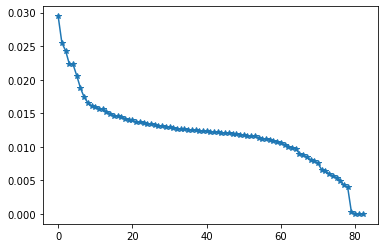

In [21]:
plt.plot(pca.explained_variance_ratio_, '-*')

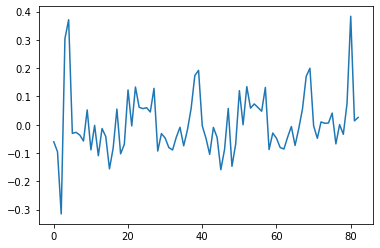

In [28]:
com = pca.components_
plt.plot(com[1])
# plt.ylim([-0.001,0.001])

In [23]:
X = pca.transform(features)

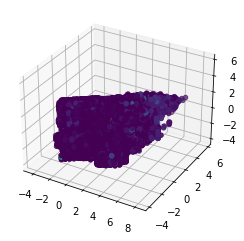

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=df_truth["DEP_DELAY_NEW"].to_numpy(), cmap='viridis');

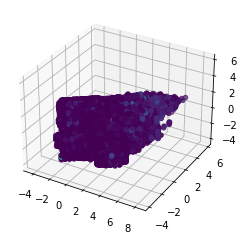

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=df_truth["ARR_DELAY_NEW"].to_numpy(), cmap='viridis');

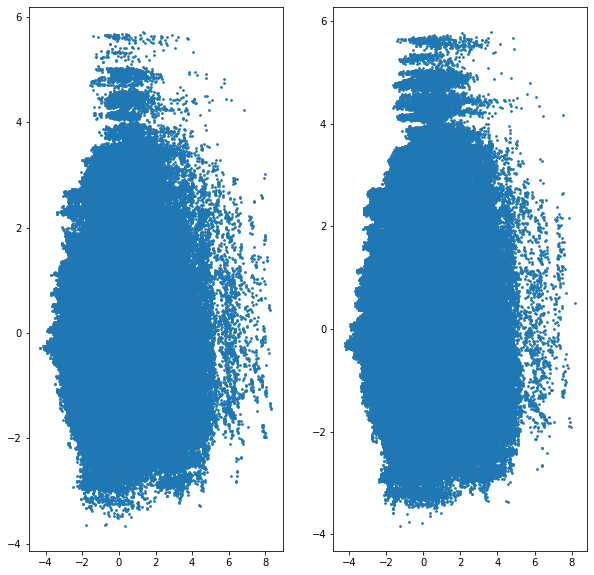

In [26]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.scatter(X[df_truth["DEP_DELAY_NEW"].to_numpy() >= 15, 0], X[df_truth["DEP_DELAY_NEW"].to_numpy() >= 15, 1], s=3)
plt.subplot(1,2,2)
plt.scatter(X[df_truth["DEP_DELAY_NEW"].to_numpy() < 15, 0], X[df_truth["DEP_DELAY_NEW"].to_numpy() < 15, 1], s=3)

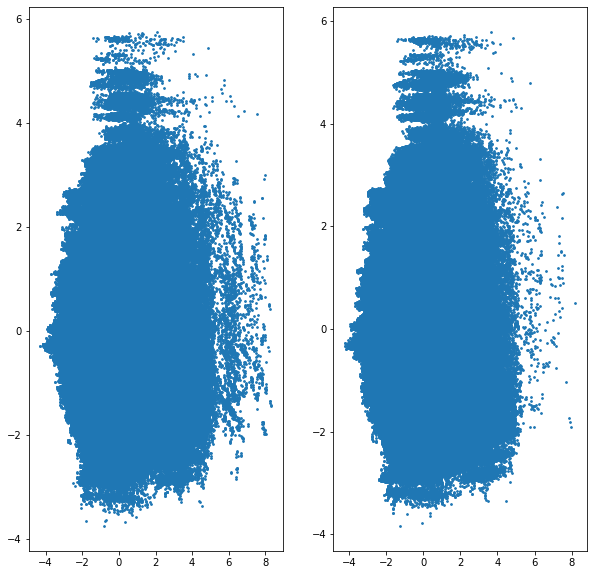

In [27]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.scatter(X[df_truth["ARR_DELAY_NEW"].to_numpy() > 0, 0], X[df_truth["ARR_DELAY_NEW"].to_numpy() > 0, 1], s=3)
plt.subplot(1,2,2)
plt.scatter(X[df_truth["ARR_DELAY_NEW"].to_numpy() <= 0, 0], X[df_truth["ARR_DELAY_NEW"].to_numpy() <= 0, 1], s=3)

### LDA (supervised)

In [49]:
y = df_truth["DEP_DELAY_NEW"].to_numpy() >= 15
y = y + [0]*y.shape[0]
y

array([0, 1, 0, ..., 0, 0, 0])

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# run an LDA and use it to transform the features
X_lda = lda.fit(features, y).transform(features)

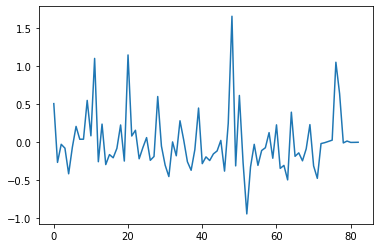

In [61]:
plt.plot(lda.scalings_)

In [62]:
np.where(lda.coef_ == np.max(lda.coef_[0,70:]))

(array([0], dtype=int64), array([76], dtype=int64))

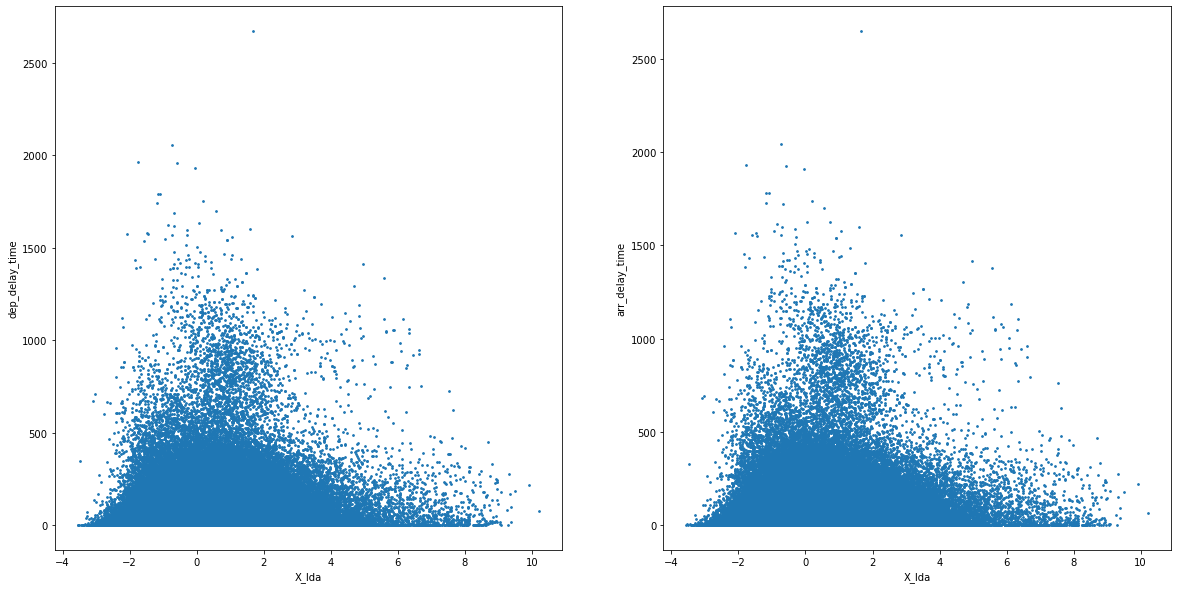

In [29]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(X_lda, df_truth["DEP_DELAY_NEW"].to_numpy(), s=3)
plt.ylabel("dep_delay_time")
plt.xlabel("X_lda")
plt.subplot(1,2,2)
plt.scatter(X_lda, df_truth["ARR_DELAY_NEW"].to_numpy(), s=3)
plt.ylabel("arr_delay_time")
plt.xlabel("X_lda")
plt.show()

## KernelPCA

In [30]:
from sklearn.decomposition import KernelPCA

In [40]:
sub_features = features[:10000]

In [41]:
kpca = KernelPCA(n_components = 20, kernel = 'rbf')
X_kpca = kpca.fit_transform(sub_features)

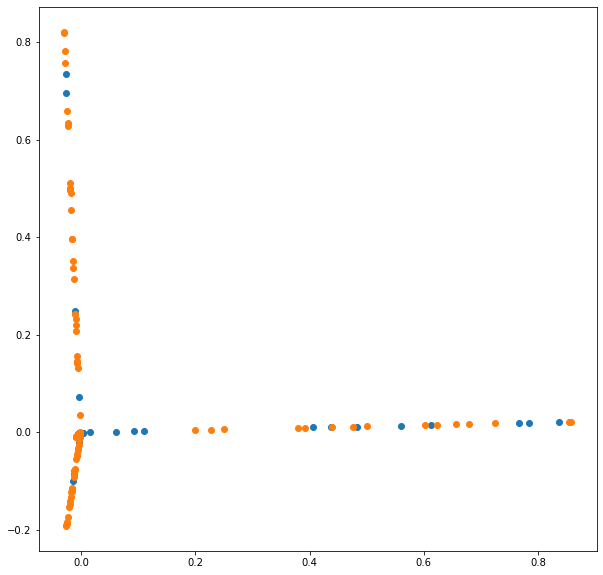

In [46]:
plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
plt.scatter(X_kpca[df_truth["DEP_DELAY_NEW"].to_numpy()[:10000] > 0,0],X_kpca[df_truth["DEP_DELAY_NEW"].to_numpy()[:10000] > 0,1])
# plt.subplot(1,2,2)
plt.scatter(X_kpca[df_truth["DEP_DELAY_NEW"].to_numpy()[:10000] <= 0,0],X_kpca[df_truth["DEP_DELAY_NEW"].to_numpy()[:10000] <= 0,1])